This notebook reproduces the timepoint-by-timepoint recall temporal correlation matrices

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as patches
import seaborn as sns
import pandas as pd
from scipy.spatial.distance import cdist

def draw_bounds(ax, model):
    bounds = np.where(np.diff(np.argmax(model.segments_[0], axis=1)))[0]
    bounds_aug = np.concatenate(([0],bounds,[model.segments_[0].shape[0]]))
    for i in range(len(bounds_aug)-1):
        rect = patches.Rectangle((bounds_aug[i], bounds_aug[i]), bounds_aug[i+1]-bounds_aug[i], 
                                 bounds_aug[i+1]-bounds_aug[i], linewidth=1, edgecolor='#FFF9AE', 
                                 facecolor='none')
        ax.add_patch(rect)
    return ax


## Load the data

In [2]:
video_model, recall_models = np.load('../../../data/processed/models_t100_v50_r10.npy')
boundary_models = np.load('../../../data/processed/recall_eventseg_models_wasserstein')

## Compute correlation matrices

In [3]:
corrmats = [1 - cdist(r, r, 'correlation') for r in recall_models]

## Plot figure

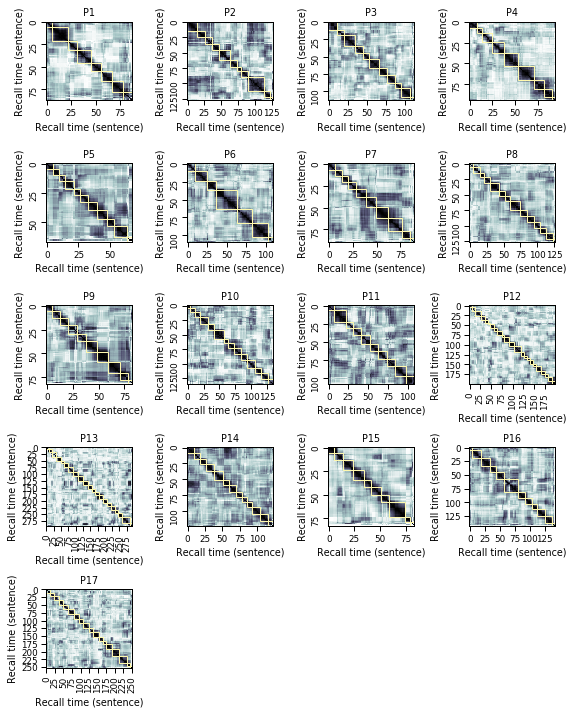

In [4]:
sns.set_context('paper')
fig, axarr = plt.subplots(5, 4)
axarr = axarr.flatten()
fig.set_size_inches(8, 10)
cmap = plt.cm.bone_r
mpl.rcParams['pdf.fonttype'] = 42

for i, (c, ax, b) in enumerate(zip(corrmats, axarr, boundary_models)):
    data = pd.DataFrame(c)
    a = sns.heatmap(data, 
                     cmap=cmap, xticklabels=25, yticklabels=25, 
                     vmin=0, vmax=1, ax=ax, cbar=False)
    a.set_ylabel('Recall time (sentence)')
    a.set_xlabel('Recall time (sentence)')
    a.set_title('P%s' % str(i+1))
    
    for _, spine in a.spines.items():
        spine.set_visible(True)
        
    a.collections[0].remove()
    a.imshow(data, aspect='auto', cmap=cmap)
        
    draw_bounds(ax, b)
        
axarr[17].axis('off')
axarr[18].axis('off')
axarr[19].axis('off')
plt.tight_layout()
# plt.savefig('../../paper/figs/video_recall_corrmats.pdf')
plt.savefig('/mnt/corrmats_wasserstein.pdf')
plt.show()